## Project Description

The goal of this project is to identify patterns that determine the success of computer games based on historical data on sales, user and critic ratings, as well as genres and platforms. This knowledge will allow the online store "Streamchik" to predict potentially successful games and plan advertising campaigns for 2017.

**Research Goal**:

The main goal of the research is to analyze global game sales data and identify factors influencing their success. Specifically, it is important to determine which platforms and genres are most promising for planning future sales, as well as to assess the impact of user and critic ratings on game popularity. The analysis will focus on data up to 2016 to make forecasts for 2017.

**Research Plan**:
1. [Data Overview:](#Overview)
- Opening and primary analysis of data contained in the games.csv file.
- Assessment of data structure and preliminary processing to eliminate errors and fill missing values.

2. [Data Preparation:](#Preparation)
- Converting column names to lowercase for convenient data handling.
- Converting data types in columns for correct operation with numbers and dates.
- Handling missing data, including dealing with the 'tbd' abbreviation in user ratings.
- Calculating total sales by region (North America, Europe, Japan, and others).

3. [Exploratory Data Analysis:](#Analysis)

- Analyzing the number of games released by year to determine relevant time periods.
- Studying sales dynamics across various platforms, identifying platforms with the highest sales.
- Assessing the life cycle of platforms (emergence and disappearance), selecting the most promising platforms for analysis.
- Building a distribution graph of global game sales by platform using a "box plot" to assess data spread.
- Analyzing the impact of critic and user ratings on sales within popular platforms using scatter plots and correlation calculations.
- Investigating the distribution of game sales by genre to identify the most profitable and popular genres.

4. [User Profile by Region:](#Region)
- Determining the top 5 popular platforms in different regions (North America, Europe, Japan).
- Analyzing the most popular genres in each region, comparing user preferences.
- Investigating the impact of ESRB age ratings on sales in each region.

5. [Hypothesis Testing:](#Testing)
- Testing the hypothesis that the average user ratings of games on Xbox One and PC platforms are the same.
- Testing the hypothesis that the average user ratings of Action and Sports genres are different.
- Appropriate statistical criteria (e.g., Student's t-test) are used to test the hypotheses.

6. [General Conclusion:](#Conclusion)
- Conclusions about the factors determining the success of games will be formulated based on the data analysis.

7. [Business Recommendations:](#Recommendations)
- Recommendations will be provided for planning advertising campaigns for games in 2017.

**Data Description**:

- `Name` — game title
- `Platform` — platform
- `Year_of_Release` — year of release
- `Genre` — game genre
- `NA_sales` — sales in North America (millions of copies sold)
- `EU_sales` — sales in Europe (millions of copies sold)
- `JP_sales` — sales in Japan (millions of copies sold)
- `Other_sale` — sales in other countries (millions of copies sold)
- `Critic_Score` — critic score (maximum 100)
- `User_Score` — user score (maximum 10)
- `Rating` — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

## <a name='Overview'></a> 1. Data Overview

In [ ]:
# Loading libraries
import pandas as pd
import seaborn as sns
from scipy import stats
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the CSV file with game sales data
df = pd.read_csv('/content/drive/MyDrive/Yandex_Practicum/datasets for DS/games.csv')

In [ ]:
# Function to display general DataFrame info
def analyze_dataframe(df):
    # Output first 5 rows
    print("First 5 rows:")
    display(df.head())

    # Output general info
    print("\nGeneral DataFrame info:\n")
    df.info()

    # Statistical description
    print("\nStatistical description:")
    display(df.describe())

    # Number of duplicates
    duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicates: {duplicates}")

    # Check for missing values
    print("\nMissing values per column:")
    display(df.isnull().sum())

analyze_dataframe(df)

First 5 rows:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



General DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Statistical description:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Number of duplicates: 0

Missing values per column:


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


**Missing Values:**

- The `Name` and `Genre` columns each contain 2 missing values, which can be fixed by deleting these rows, as their small number is insignificant.

- The `Year_of_Release` column has 269 missing values — we can either delete the rows with missing values or fill them with a numeric placeholder, but this will require filtering in further calculations.

- In the `Rating` column, missing values may be important for analysis, so they should be replaced with a placeholder, for example, "Unknown".

- Missing values in the `Critic_Score` and `User_Score` columns require a special approach, as many values are missing (8578 and 6701). Perhaps we should fill them with median values or consider other processing options.

**Data Cleanup:**

- Column names are in different cases.

- The `Year_of_Release` column should be of type int, not float.

- The `User_Score` column is of type `object`, but should be numeric. Incorrect values, such as `tbd`, may be present.

- There are no explicit duplicates, but we need to check for implicit duplicates in `Name`, `Year_of_Release`, and `Platform`.

## <a name='Preparation'></a> 2. Data Preparation

In [ ]:
# Display all columns in the table
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
# Create a dictionary for renaming DataFrame columns
columns = {
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
}

# Rename DataFrame columns according to the 'columns' dictionary
df = df.rename(columns=columns)

# Check column changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Convert the year_of_release column to integer format
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [ ]:
# Check for anomalies in the user_score column values
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

`user_score` column:

- This column should contain numeric values but is presented as object, likely due to string values `tbd` (to be determined).

- Solution: first replace `tbd` with `NaN`, then convert data to float64 type.

In [ ]:
# Replace 'tbd' in user_score with NaN and convert to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [ ]:
def missing_values(df):
    missing_data = df.isnull().sum()  # Number of missing values in each column
    total_entries = len(df)  # Total number of rows in DataFrame
    missing_percentage = (missing_data / total_entries) * 100  # Percentage of missing values
    return pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Check missing values in data
missing_values(df)

,Missing Values,Percentage
name,2,0.011965
platform,0,0.000000
year_of_release,269,1.609333
genre,2,0.011965
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,51.319174
user_score,9125,54.591684


In [ ]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


In [ ]:
# Drop rows with missing values in critical columns
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# Replace missing values in the rating column with "unknown"
df['rating'] = df['rating'].fillna('unknown')

# Check missing values in data
missing_values(df)

,Missing Values,Percentage
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8461,51.453418
user_score,8981,54.615665


During data exploration, no explicit duplicates were found. We should check for implicit duplicates in the `name`, `platform`, `year_of_release` columns.

In [ ]:
# Check for implicit duplicates
potential_duplicates = df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

# Output results of implicit duplicates check
print(f"Potential implicit duplicates found: {len(potential_duplicates)}")

# Display examples of implicit duplicates for analysis
if len(potential_duplicates) > 0:
    print(potential_duplicates.head())

Potential implicit duplicates found: 2
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      E  
16230       0.0         0.00          83.0         5.5      E  


- Identical values in key columns: `name`, `platform`, and `year_of_release` are the same for both rows.

- Sales values differ: one row has higher sales (in the North American market and other regions), while the other row has near-zero sales.

We will perform data aggregation: Since this is the same game on the same platform in the same year, we can merge the rows by summing sales by region (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`) and keeping the other characteristics (e.g., `ritic_score`, `user_score`, and `rating`).

In [ ]:
# Grouping and summing sales for identical games
df = df.groupby(['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'], as_index=False).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
})

In [ ]:
# Create a new column with total sales
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Display the first five rows of df
df.head()

,name,platform,year_of_release,genre,critic_score,user_score,rating,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Tales of Xillia 2,PS3,2012,Role-Playing,71.0,7.9,T,0.20,0.12,0.45,0.07,0.84
1,.hack//Infection Part 1,PS2,2002,Role-Playing,75.0,8.5,T,0.49,0.38,0.26,0.13,1.26
2,.hack//Mutation Part 2,PS2,2002,Role-Playing,76.0,8.9,T,0.23,0.18,0.20,0.06,0.67
3,.hack//Outbreak Part 3,PS2,2002,Role-Playing,70.0,8.7,T,0.14,0.11,0.17,0.04,0.46
4,007 Racing,PS,2000,Racing,51.0,4.6,T,0.30,0.20,0.00,0.03,0.53


During data preparation, we performed the following steps:

- Handling missing values: Missing values in key columns such as `year_of_release`, `genre`, `name` were analyzed and removed. Missing values in rating were replaced with placeholders NaN and unknown.

- Data type conversion: The `user_score` column was converted to `float`, and `year_of_release` to `int`.

- Checking and analyzing implicit duplicates: A check was performed based on key fields `name`, `platform`, `year_of_release`, revealing several potential implicit duplicates. These rows, although having identical values in the specified columns, differ in some other metrics, such as sales in different regions. I kept these rows for further analysis, as differences in metrics could be the result of differences in sales data collection rather than duplication errors.

- Standardizing columns: To unify and facilitate work with data, column names were converted to lowercase, which simplifies further manipulations with the DataFrame.

## <a name='Analysis'></a> 3. Exploratory Data Analysis

In [ ]:
# Group data by release year and count the number of games in each year
games_per_year = df.groupby('year_of_release')['name'].count()

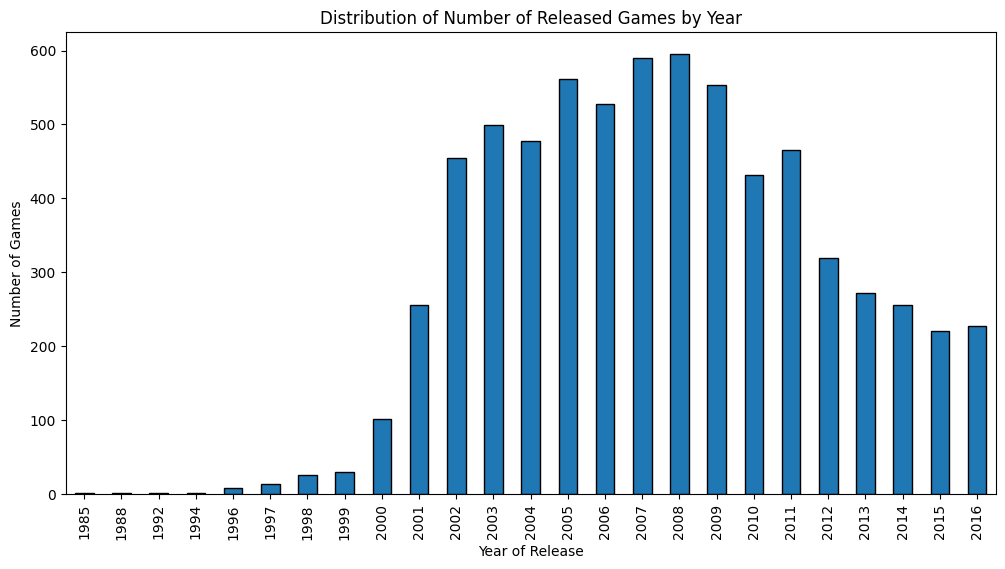

In [ ]:
# Plotting a bar chart for the number of released games by year (discrete values)
games_per_year.plot(kind='bar', figsize=(12, 6), edgecolor='black')

# Adding axis labels and title
plt.title('Distribution of Number of Released Games by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')

# Show plot
plt.show()

**Analysis of the number of released games by year shows the following trends:**

- In the early years, from the mid-1990s, the number of released games was small — less than 50 games per year.

- From the mid-2000s to 2003, there is a significant growth in the number of games, reaching up to 500 per year.

- Then there are slight fluctuations with increases (2003, 2005) and drops (2004, 2006) around 500.

- The highest peaks occurred in 2007 and 2008, slightly less than 600 games annually.

- After 2009, the number of released games begins to gradually decline: from 2010 to 2016 we see a steady drop.

Data for all periods are not equivalent. To analyze current trends and build a forecast, it is better to focus on the period from 2000, as the video game market formed during this period, and modern platforms appeared.

In [ ]:
# Group data by platforms and calculate total sales for each platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)

,total_sales
platform,
PS2,946.01
X360,853.67
PS3,785.44
Wii,659.23
DS,382.88
PS4,244.27
XB,212.22
PS,209.98
PC,189.85


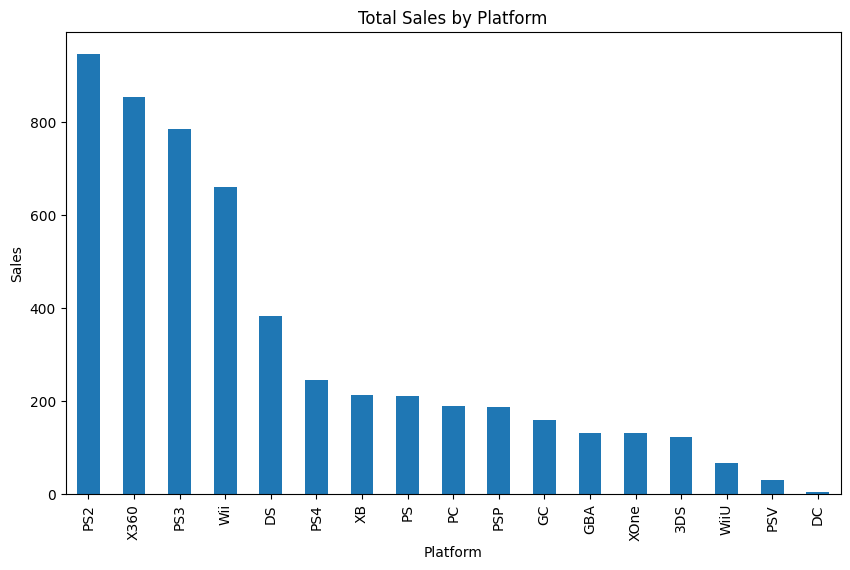

In [ ]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

4 leaders in total sales clearly stand out: PS2, X360, PS3, Wii, but let's keep 5.

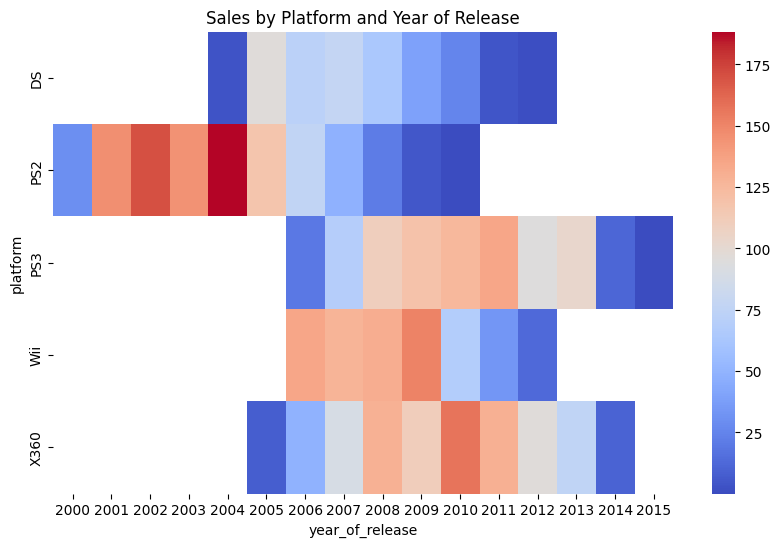

In [ ]:
# Filter data starting from 2000
df = df[df['year_of_release'] >= 2000]

# Select the top 5 platforms
# (Note: The original comment said 6, but the code selects 5, so I corrected the comment to match the code)
top_platforms_sales = platform_sales.head(5).index

# Filter data for top 5 platforms only
top_platform_sales = df[df['platform'].isin(top_platforms_sales)]

# Group data by platform and year of release and calculate total sales for each combination
platform_sales_per_year = top_platform_sales.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum',
)

# Build a heatmap
plt.figure(figsize=(10, 6))  # Set plot size
sns.heatmap(platform_sales_per_year, cmap="coolwarm")
plt.title("Sales by Platform and Year of Release")
plt.show()

**Analysis of the heatmap of sales by platform and year**

The heatmap allows for a visual assessment of how sales of different gaming platforms have changed over time. Based on the presented map, the following conclusions can be drawn:


**PS2 and PS3:**

- Gradual transition: The heatmap shows a gradual transition from PS2 to PS3. The peak of PS2 sales in 2004 and the subsequent decline coincide with the beginning of PS3 sales growth. This smooth transition can be explained by several factors:
- Coexistence: Both generations of consoles coexisted on the market for several years, giving players a choice.
- Game Catalog: Many developers continued to release games for PS2 even after the release of PS3, maintaining interest in this platform.
- Price: The price reduction of the PS2 made it more accessible to a wider audience.

**DS:**

- Stable popularity: DS demonstrated stable sales throughout its life cycle, especially compared to other platforms. This may be due to the unique dual-screen concept and focus on casual games.
- Early market entry: DS entered the market earlier than PS3 and Xbox 360 and managed to win its audience.

**Wii:**

- Bright debut and rapid decline: The Wii was distinguished by its unique design and innovative controllers, which ensured a rapid growth in popularity compared to the Xbox 360, which gained popularity more smoothly. However, the duration of its life cycle turned out to be shorter than that of its competitors.

**X360:**

- Growth and decline: Xbox 360 showed a typical console life cycle: rapid sales growth after launch, a peak, and a subsequent decline. This is due to market saturation and the emergence of a new generation of consoles.

**Additional observations:**

- Cyclicality: It is evident that each platform has its own life cycle: a growth period, a sales peak, and a subsequent decline.
- Competition: Platforms compete with each other for market share. For example, the growth in Wii popularity in the mid-2000s was accompanied by a decline in PS2 sales.
- Generational change: The change in generations of game consoles is visible through the change of market leaders.

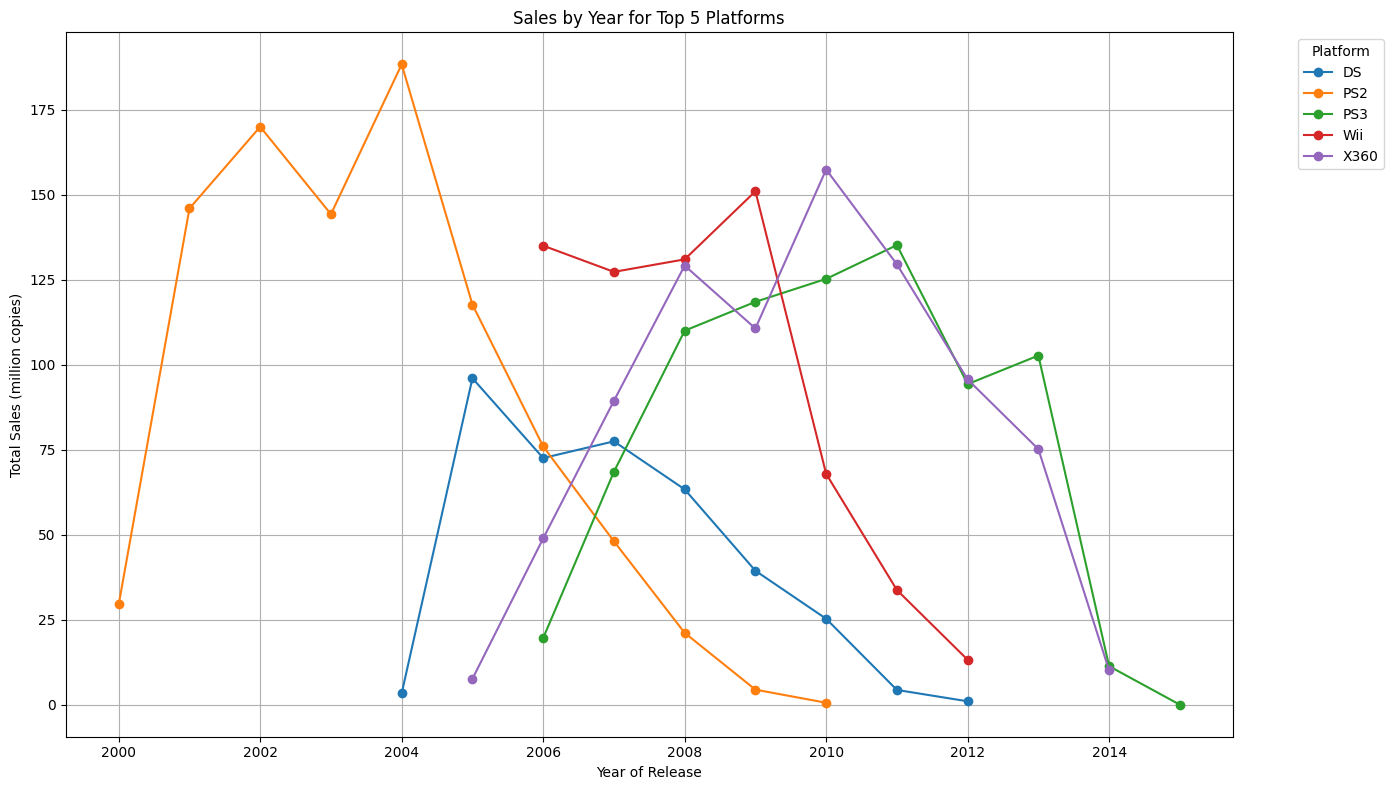

In [ ]:
# Build a line plot for the top 5 platforms
plt.figure(figsize=(14, 8))
for platform in platform_sales_per_year.index:
    plt.plot(platform_sales_per_year.columns, platform_sales_per_year.loc[platform], marker='o', label=platform)

# Setting titles and labels
plt.title('Sales by Year for Top 5 Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (million copies)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

**Visually, we can see the life cycle for each of the top 5 platforms since 2000 on the line graph.**

- Sales Leaders: Throughout the period, PS2 and PS3 were sales leaders. They demonstrated the highest indicators and a long period of active sales. X360 launched a year earlier than PS3 but also showed similar stable growth to PS2, with higher peaks in 2008 and 2010, ending sales in 2014.

Growth and Decline:

- Growth: At the beginning of the period, there was rapid growth in Wii sales starting from 2006, which somewhat later showed a rapid decline in sales, ending in 2012. DS, after launching in 2004, reached its sales peak in 2005, but then showed a stable decline throughout the period until 2012, ending its sales.

- Decline: After reaching the peak, sales of all platforms began to decline. This is a typical life cycle for game consoles, associated with the release of new generations and changing gamer preferences.

In [ ]:
# Determine the first and last year with non-zero data for each platform
def get_first_year(row):
    return row.index[row.notna()].min() if not row.dropna().empty else None

def get_last_year(row):
    return row.index[row.notna()].max() if not row.dropna().empty else None

start_years = platform_sales_per_year.apply(get_first_year, axis=1)
end_years = platform_sales_per_year.apply(get_last_year, axis=1)

# Create a DataFrame to analyze platform life cycles
platform_life_cycle = pd.DataFrame({
    'Start_Year': start_years,
    'End_Year': end_years,
    'Duration': end_years - start_years
})

# Output results
platform_life_cycle

,Start_Year,End_Year,Duration
platform,,,
DS,2004,2012,8
PS2,2000,2010,10
PS3,2006,2015,9
Wii,2006,2012,6
X360,2005,2014,9


**Conclusions**
- Lifecycle Length: Most platforms have a lifecycle of 6 to 10 years. This indicates that platforms remain in the market for a long time before they begin to lose popularity.
- Active Years: Platforms such as the `PS2`, `PS3`, and `X360` have similar active years (9 to 10 years), which may indicate that their lifecycles are consistent with general trends in the gaming industry. The `Wii`, with a shorter lifecycle of 6 years, and the `DS`, with an 8-year lifecycle, exhibit a more limited active lifespan, possibly due to the emergence of newer, more powerful platforms.

Let's consider the last three years to forecast sales for the upcoming year 2017.

In [ ]:
# Filtering data for the period from 2014 to 2016
filtered_df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

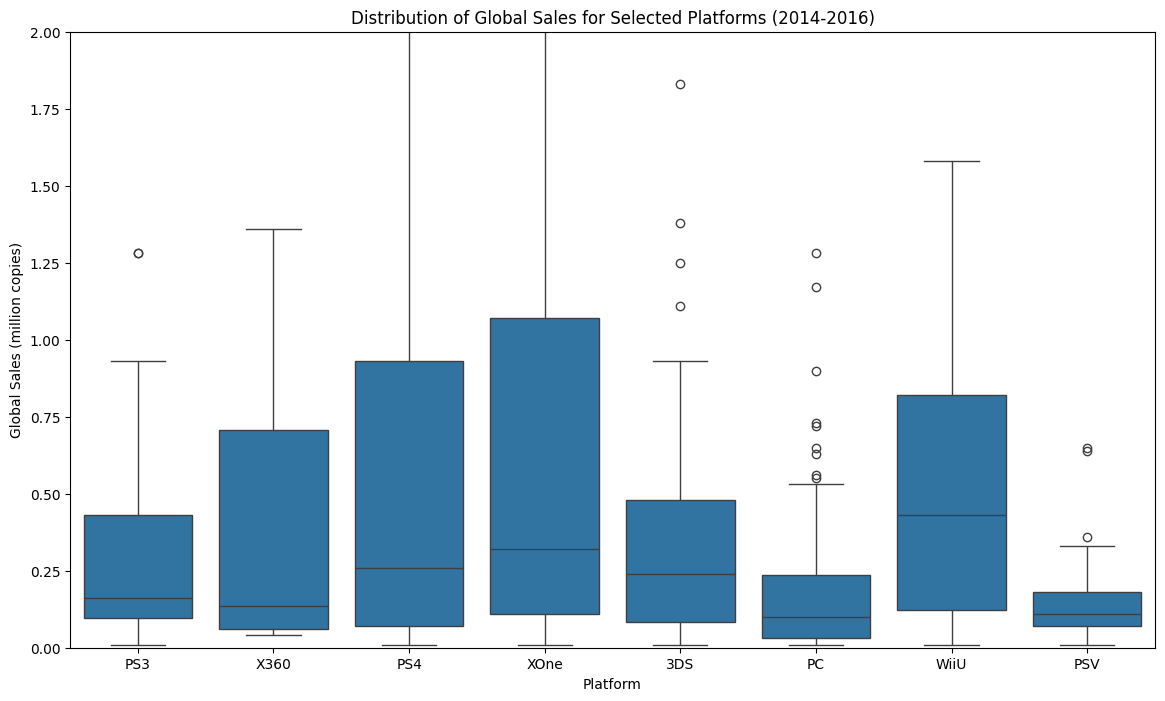

In [ ]:
# Building a boxplot broken down by platform
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_df)

# Set Y-axis limit to remove the effect of large outliers
plt.ylim(0, 2)  # Limits up to 2 million copies

# Setting titles and labels
plt.title('Distribution of Global Sales for Selected Platforms (2014-2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (million copies)')

# Show plot
plt.show()

**Visual Analysis:**

- Wii U median is higher: Although the general impression might suggest that PS4 and Xbox One are more successful, the median sales for Wii U appear to be higher. This means that a typical game on Wii U sold better than a typical game on PS4 or Xbox One during the specified period.
- Wide data spread: For most platforms, a significant data spread is observed, indicating the presence of both very successful and less successful games. This suggests high market competition and diverse player preferences.
- Outliers: The presence of outliers (points outside the "whiskers" of the box) indicates games with abnormally high or low sales. These can be either blockbusters or commercial failures.
- High maximum values for PS4 and Xbox One: Although the Wii U median is higher, the maximum sales values for PS4 and Xbox One are significantly higher. This indicates the presence of blockbuster games on these platforms that significantly outsell most games on other platforms.
- 3DS and PS3 are less popular: The 3DS and PS3 platforms demonstrate lower sales figures compared to next-generation consoles (PS4 and Xbox One). This may be due to their focus on a different audience (e.g., younger or preferring portable games).
- PC and PSV occupy an intermediate position: These platforms show average sales figures, indicating their stable position in the market.

**General trends for sales in 2017:**
- Targeting platforms with high median sales: Advertising games for Wii U may attract attention given their successful metrics.
- Highlighting blockbusters: Promotion on PS4 and Xbox One should focus on popular games that already demonstrate high maximum sales.

**Testing the impact of critic and user reviews on sales within the XOne platform:**

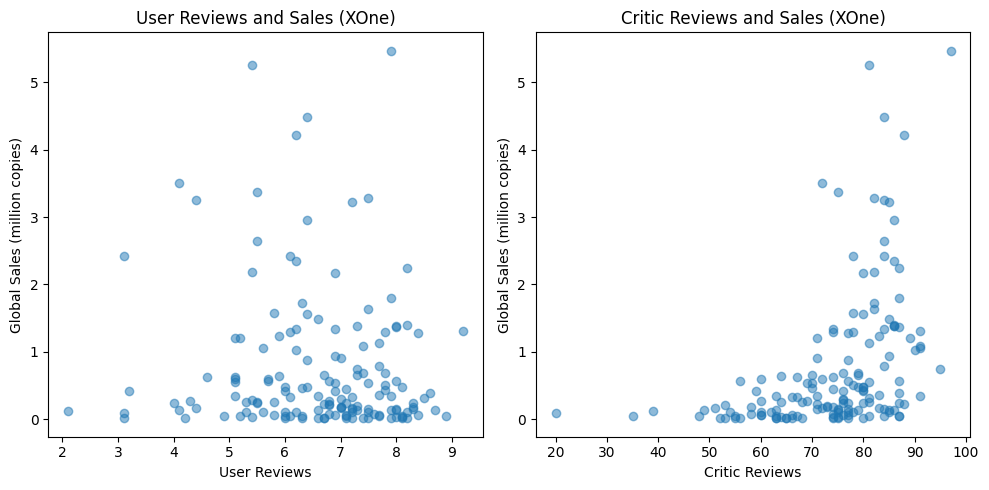

In [ ]:
# Select one popular platform - XOne
selected_platforms  = filtered_df[filtered_df['platform'] == 'XOne']

# Check for data on user and critic reviews
selected_platforms = selected_platforms[['user_score', 'critic_score', 'total_sales']].dropna()

# Build scatter plots for user reviews and sales
plt.figure(figsize=(10, 5))

# Plot for user reviews
plt.subplot(1, 2, 1)
plt.scatter(selected_platforms['user_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('User Reviews and Sales (XOne)')
plt.xlabel('User Reviews')
plt.ylabel('Global Sales (million copies)')

# Plot for critic reviews
plt.subplot(1, 2, 2)
plt.scatter(selected_platforms['critic_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('Critic Reviews and Sales (XOne)')
plt.xlabel('Critic Reviews')
plt.ylabel('Global Sales (million copies)')

plt.tight_layout()
plt.show()

**Scatter Plot Analysis**: User and Critic Reviews vs. Game Sales on XOne Platform

1. "User Reviews vs Sales" Diagram:

- Negative correlation: Points on the graph are widely scattered, indicating that user opinion is not a determining factor for sales. Many games with high user ratings have relatively low sales, and vice versa.

- Outliers: Individual games with very high sales but average user ratings are observed. This may be due to strong marketing campaigns, game uniqueness, or other factors.

2. "Critic Reviews vs Sales" Diagram:

- More pronounced positive correlation: There is a more noticeable trend towards increased sales with higher critic scores. This suggests that the opinion of professional critics has a greater impact on game sales than the opinion of ordinary users.

- Less scatter: Points on the graph are located more compactly, confirming a stronger link between critic scores and sales. However, outliers are also present, indicating that there are exceptions to the general rule here as well.

In [ ]:
# Calculate correlation between user reviews and sales for XOne
user_corr_xone = selected_platforms['user_score'].corr(selected_platforms['total_sales'])
critic_corr_xone = selected_platforms['critic_score'].corr(selected_platforms['total_sales'])

print(f"Correlation between user reviews and sales: {user_corr_xone:.2f}")
print(f"Correlation between critic reviews and sales: {critic_corr_xone:.2f}")

Correlation between user reviews and sales: -0.09
Correlation between critic reviews and sales: 0.42


**Correlation Coefficient Analysis**

- User Reviews: A correlation coefficient of -0.09 indicates a negative relationship between user ratings and sales. This confirms the visual analysis of the scatter plot.

- Critic Reviews: A correlation coefficient of 0.42 indicates a moderate positive relationship between critic ratings and sales. This is consistent with visual analysis and suggests that critic opinion plays a more important role in shaping sales than user opinion.

**Conclusions:**

- Critic opinion is more significant: Ratings from professional critics have a more substantial impact on game sales on the XOne platform compared to user ratings.

- Other factors: Sales are influenced not only by reviews but also by many other factors such as marketing campaigns, game genre, platform exclusivity, etc.

- Non-linear relationship: The relationship between ratings and sales may be non-linear. For example, there may be a threshold below which low ratings significantly affect sales, and above which the influence of ratings becomes less significant.

**Checking the impact of critic and user reviews on PS4 single-platform sales:**

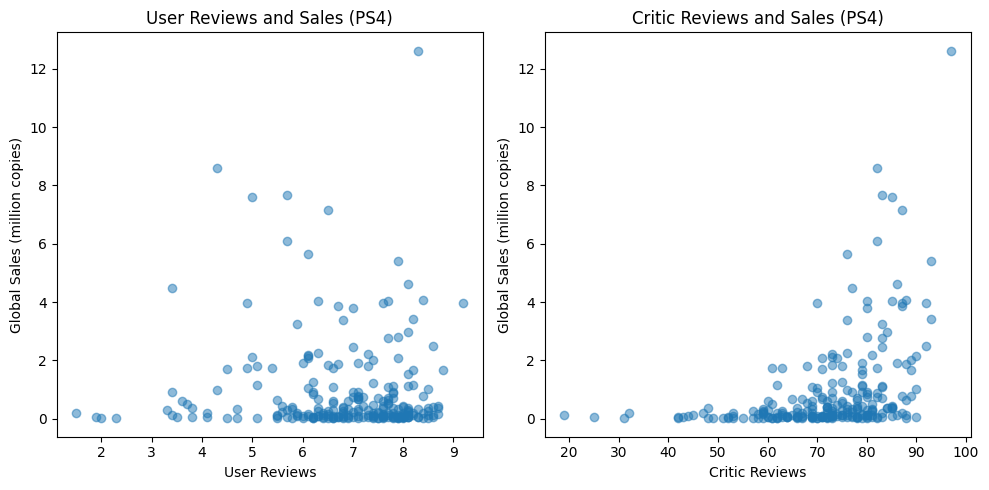

In [ ]:
# Select one popular platform - PS4
selected_platforms  = filtered_df[filtered_df['platform'] == 'PS4']

# Check for data on user and critic reviews
selected_platforms = selected_platforms[['user_score', 'critic_score', 'total_sales']].dropna()

# Build scatter plots for user reviews and sales
plt.figure(figsize=(10, 5))

# Plot for user reviews
plt.subplot(1, 2, 1)
plt.scatter(selected_platforms['user_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('User Reviews and Sales (PS4)')
plt.xlabel('User Reviews')
plt.ylabel('Global Sales (million copies)')

# Plot for critic reviews
plt.subplot(1, 2, 2)
plt.scatter(selected_platforms['critic_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('Critic Reviews and Sales (PS4)')
plt.xlabel('Critic Reviews')
plt.ylabel('Global Sales (million copies)')

plt.tight_layout()
plt.show()

**Scatter Plot Analysis**: User and Critic Reviews vs. Game Sales on PS4 Platform

1. "User Reviews vs Sales" Diagram:

- Negative correlation: Points on the graph are widely scattered, indicating that user opinion is not a determining factor for sales. Many games with high user ratings have relatively low sales, and vice versa.

- Outliers: Individual games with very high sales but average user ratings are observed. This may be due to strong marketing campaigns, game uniqueness, or other factors.

2. "Critic Reviews vs Sales" Diagram:

- More pronounced positive correlation: There is a more noticeable trend towards increased sales with higher critic scores. This suggests that the opinion of professional critics has an impact on game sales compared to the opinion of ordinary users.

- Less scatter: Points on the graph are located more compactly, confirming a stronger link between critic scores and sales. However, outliers are also present, indicating that there are exceptions to the general rule here as well.

In [ ]:
# Calculate correlation between user reviews and sales for PS4
user_corr_ps4 = selected_platforms['user_score'].corr(selected_platforms['total_sales'])
critic_corr_ps4 = selected_platforms['critic_score'].corr(selected_platforms['total_sales'])

print(f"Correlation between user reviews and sales: {user_corr_ps4:.2f}")
print(f"Correlation between critic reviews and sales: {critic_corr_ps4:.2f}")

Correlation between user reviews and sales: -0.04
Correlation between critic reviews and sales: 0.40


**Correlation Coefficient Analysis:**

- User Reviews: A correlation coefficient of -0.09 indicates a negative relationship between user ratings and sales. This confirms the visual analysis of the scatter plot.

- Critic Reviews: A correlation coefficient of 0.42 indicates a moderate positive relationship between critic ratings and sales. This is consistent with visual analysis and suggests that critic opinion plays a more important role in shaping sales than user opinion.

**Conclusions**:

- Critic opinion is more significant: Ratings from professional critics have a more substantial impact on game sales on the PS4 platform compared to user ratings.

- Other factors: Sales are influenced not only by reviews but also by many other factors such as marketing campaigns, game genre, platform exclusivity, etc.

- Non-linear relationship: The relationship between ratings and sales may be non-linear. For example, there may be a threshold below which low ratings significantly affect sales, and above which the influence of ratings becomes less significant.

**Calculating total sales by genre from 2014 to 2016:**

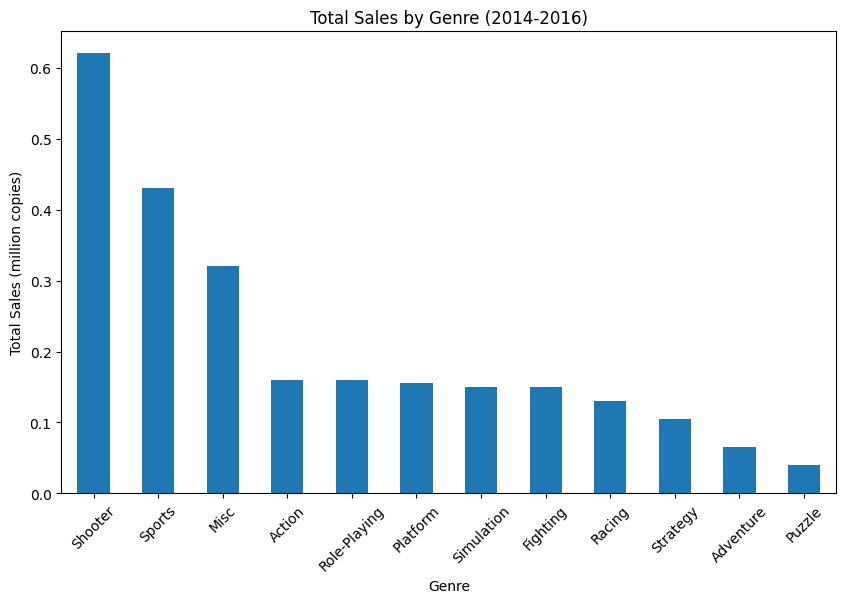

In [ ]:
# Group data by genre and calculate median sales
genre_sales = filtered_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Bar chart of total sales by genre
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (million copies)')
plt.xticks(rotation=45)
plt.show()

**Key conclusions based on the presented chart:**

- Dominance of several genres: The genres `Shooter`, `Sports`, and `Misc` demonstrate significantly higher sales compared to other genres. This may indicate that these genres are most in demand by a wide audience or the presence of extremely successful blockbuster games in these categories.

- Average sales level: The genres `Action`, `Role-Playing`, `Platform`, `Fighting`, and Simulation occupy an intermediate position and demonstrate relatively stable sales.

- Low sales: The genres `Racing`, `Strategy`, `Adventure`, and `Puzzle` show the lowest sales volumes. This may indicate less popularity of these genres among the mass audience or a narrower niche for these games.

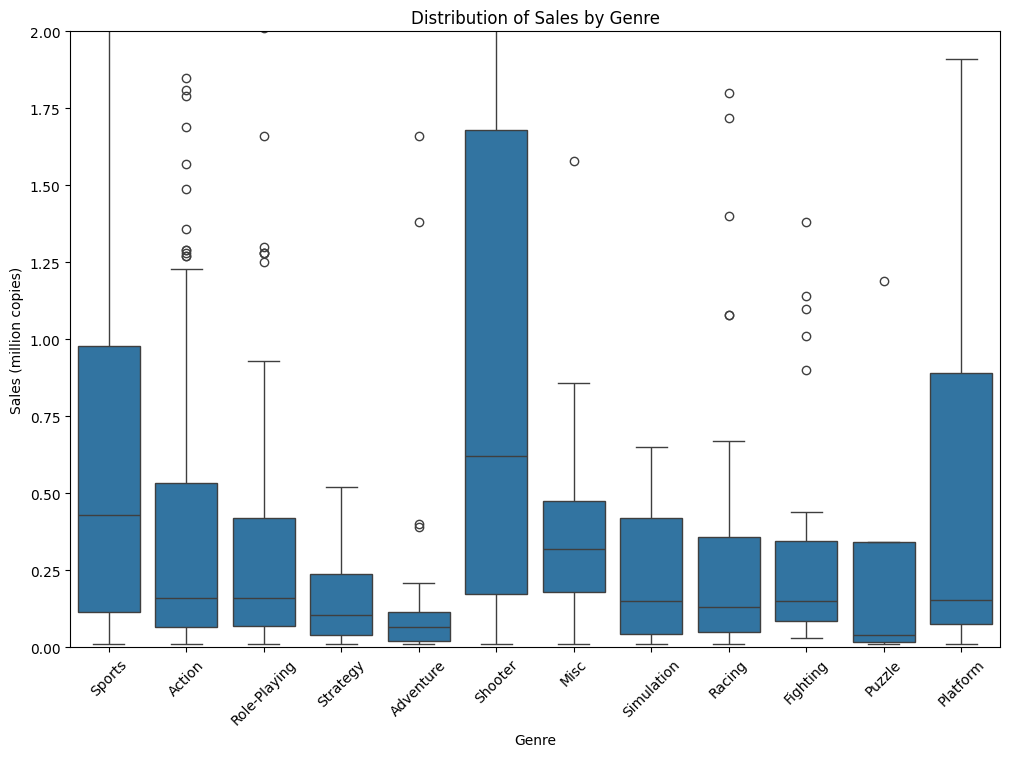

In [ ]:
# Increase plot size
plt.figure(figsize=(12, 8))

# Build boxplot of sales by genre
sns.boxplot(x='genre', y='total_sales', data=filtered_df)

# Set Y-axis limit to remove the effect of large outliers
plt.ylim(0, 2)  # Limits up to 2 million copies

# Add title and axis labels
plt.title('Distribution of Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (million copies)')
plt.xticks(rotation=45)

# Show plot
plt.show()

Boxplot data confirms the conclusions of the previous chart:

- Medians of “Shooter”, “Sports”, and “Misc” genres show higher sales compared to other genres.

- Lower average values for “Action”, “Role-playing”, “Platform”, “Simulation”, and “Fighting”.

- “Strategy”, “Adventure”, and “Puzzle” genres show lower sales medians.

- There is a large range, meaning sales in this genre are distributed unevenly, and there is a significant difference between games in the lower and upper half of the distribution.

## <a name='Region'></a> 4. User Profile by Region

**Most popular platforms by region:**

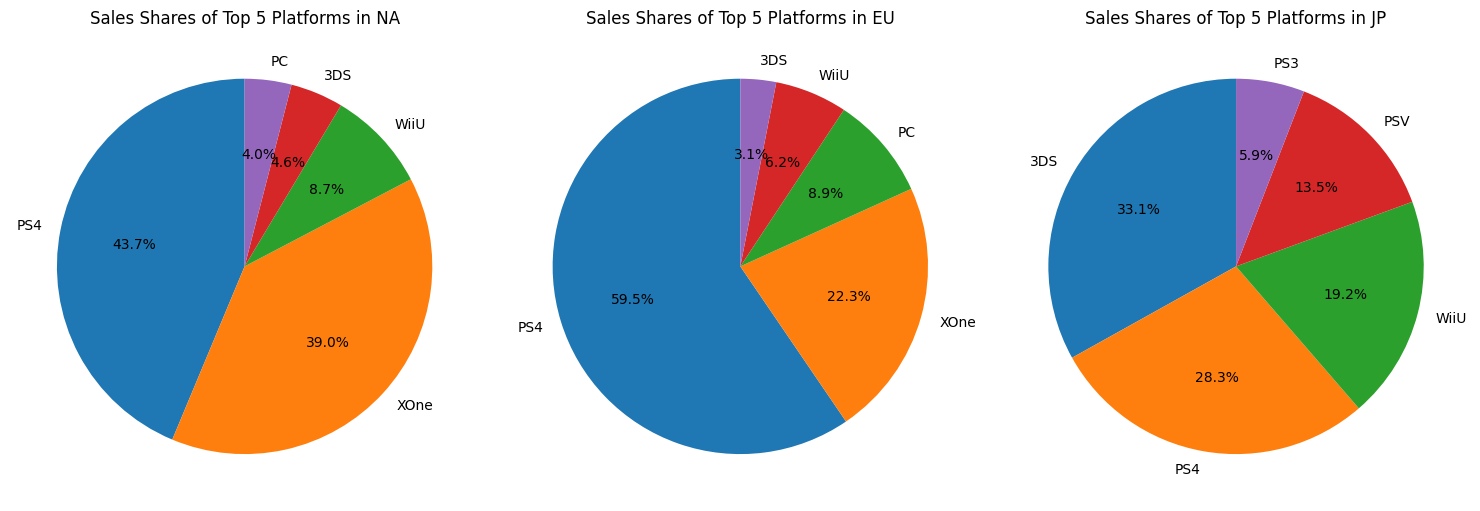

In [ ]:
# Determine top 5 platforms and their shares for each region
platform_sales_share = {}
for region in ['NA', 'EU', 'JP']:
    top_platforms = filtered_df.groupby('platform')[f'{region.lower()}_sales'].sum().nlargest(5)
    total_sales = filtered_df[f'{region.lower()}_sales'].sum()
    shares = (top_platforms / total_sales) * 100  # Share in percentage
    platform_sales_share[region] = shares

# Visualization of sales shares using a pie chart
plt.figure(figsize=(15, 5))  # Figure size for three plots

for i, (region, shares) in enumerate(platform_sales_share.items()):
    plt.subplot(1, 3, i + 1)  # One row and three columns
    shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Sales Shares of Top 5 Platforms in {region}')
    plt.ylabel('')  # Remove ylabel for cleaner plot

plt.tight_layout()  # Remove extra spacing
plt.show()

**Regional Comparison**

**North America (NA):**

- In North America, the largest market share is held by PS4 (43.7%) and Xbox One (39%), indicating a strong gamer attachment to these consoles.

- Wii U is also popular but with a smaller market share of 8.7%.

- PC and 3DS show significantly smaller shares, both having less than 5%.

**Europe (EU):**

- The European market is distinguished by a pronounced attachment to the PS4 platform, which occupies 59.5% of the market.

- Xbox One holds a significant share of 22.3%.

- Rounding out the top five are PC with 8.9%, Wii U with 6.2%, and 3DS with about 3%.

**Japan (JP):**

- In Japan, the 3DS is in first place with a share of 33.1%.

- PlayStation 4 takes second place with 28.3%.

- Wii U (19.2%) and PlayStation Vita (13.5%) are also popular, although their share is lower.

- PlayStation 3 has a significantly smaller market share — only 5.9%.

**Most popular genres by region:**

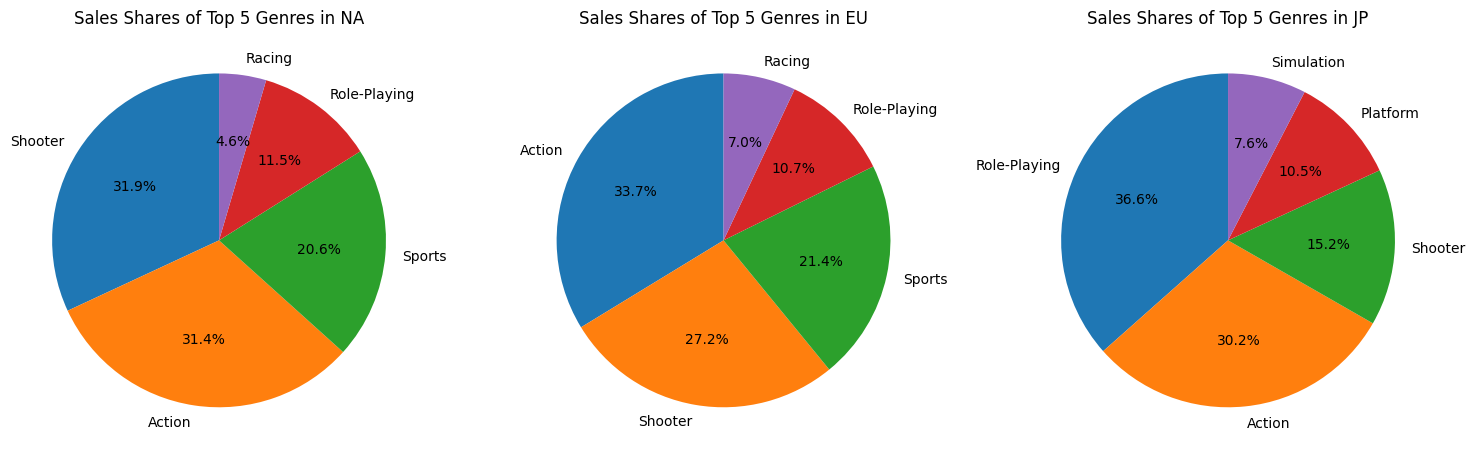

In [ ]:
# Determine top 5 genres and their shares for each region
genre_sales_share = {}
for region in ['NA', 'EU', 'JP']:
    top_genres = filtered_df.groupby('genre')[f'{region.lower()}_sales'].sum().nlargest(5)  # Top 5 genres
    total_sales = filtered_df[f'{region.lower()}_sales'].sum()  # Total sales in region
    shares = (top_genres / total_sales) * 100  # Share in percentage
    genre_sales_share[region] = shares

# Visualization of sales shares using a pie chart
plt.figure(figsize=(15, 5))  # Figure size for three plots

for i, (region, shares) in enumerate(genre_sales_share.items()):
    plt.subplot(1, 3, i + 1)  # One row and three columns
    shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Sales Shares of Top 5 Genres in {region}')
    plt.ylabel('')  # Remove ylabel for cleaner plot

plt.tight_layout()  # Remove extra spacing
plt.show()

**Key Conclusions:**

- Global popularity of Action: The Action genre holds the leading position in sales in all three regions, demonstrating the universal appeal of dynamic games.

- Regional features: Despite the general trend, each region has its own preferences:

**North America (NA)**:
- Besides Action (31.4%), Shooters (31.9%) and Sports simulations (20.6%) are popular. Misc and Racing genres have a significantly smaller market share.

**Europe (EU)**:
- In Europe, Action (33.7%), Shooters (27.2%), and Sports simulations (21.4%) are also popular. The share of Misc and Racing genres is significantly smaller.

**Japan (JP)**:
- The Japanese market demonstrates the most distinct specificity. Here, Role-Playing games lead (36.6%), reflecting the traditional love of Japanese gamers for RPGs. Action (30.2%) is also popular. Shooter games (15.2%) are slightly more popular than Platform and Simulation, which also have a significantly smaller market share.

**Impact of ESRB rating on sales:**

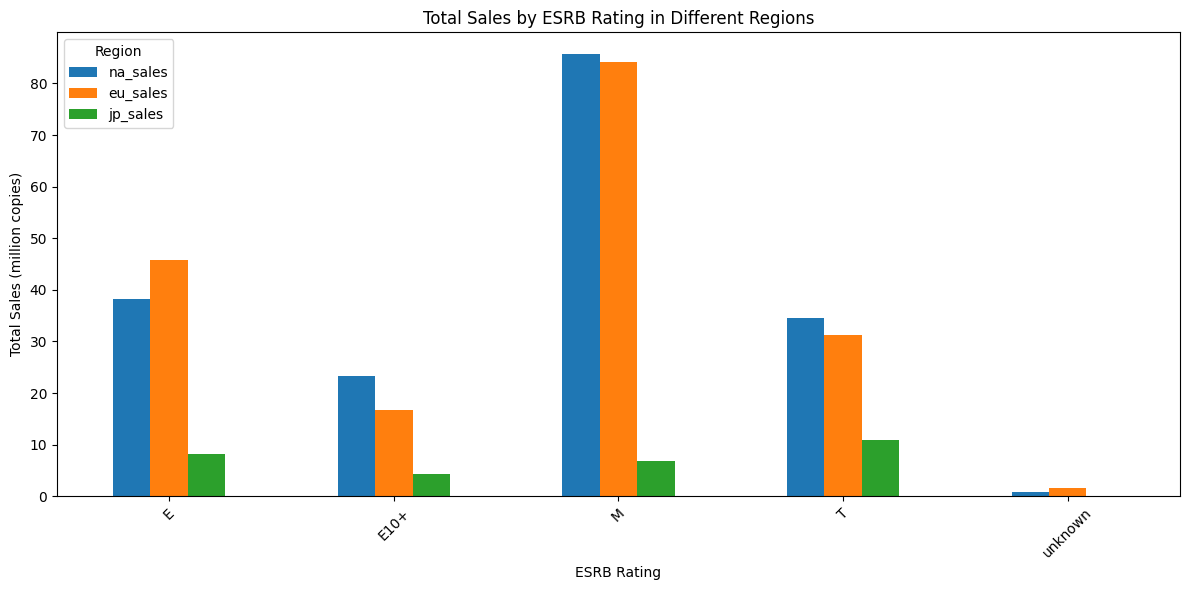

In [ ]:
# Calculate total sales by ESRB rating for each region
esrb_sales = filtered_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Visualization of sales by ESRB rating
esrb_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by ESRB Rating in Different Regions')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (million copies)')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.show()

**General Picture:**

- Dominance of "M" (Mature) rating: In two regions (North America and Europe), games with an "M" rating (for adults) demonstrate the highest total sales. This suggests that games with more mature content are most popular among gamers.

- Differences between regions: Despite the general trend, significant differences in gamer preferences are observed across regions:

- **North America:** Here, games with an "M" rating have a significant advantage over other ratings.

- **Europe**: In Europe, "M" rated games also predominate, but "E" rated games are slightly more popular than in North America.

- **Japan**: In Japan, "M" rated games rank third after T (Teen) and E (Everyone).

- Low popularity of "E10+" rating: Games with this rating show the lowest sales in all regions. This may be due to the fact that this rating is often associated with simpler and childish games.

**Detailed analysis by ratings:**

- "M" (Mature): Ranks first in North America and Europe, but its share is smaller in Japan compared to "T" rated games. This indicates a significant audience of adult gamers who prefer games with more mature content.

- "E" (Everyone): Ranks second in all three regions. Games with this rating often represent family entertainment, sports simulations, and casual games.

- "T" (Teen): In Japan, "T" rated games take the leading position. This is explained by the popularity of Japanese RPGs (JRPGs), which often carry this rating. In other regions, the share of "T" rated games is also significant and ranks third.

- "E10+": Ranks 4th in all three regions.

- "unknown": Games with this rating have a significantly smaller market share, indicating its niche nature.

## <a name='Testing'></a> 5. Hypothesis Testing

**Hypothesis about Xbox One and PC platform ratings:**

- Null hypothesis (H0): Average user ratings for Xbox One and PC platforms are the same.

- Alternative hypothesis (H1): Average user ratings for Xbox One and PC platforms are different.

**Choosing the alpha threshold**

- Let's set the significance level α = 0.05, which is standard practice in statistics. This means we are willing to accept a 5% risk of being wrong.

**Hypothesis Testing Criteria**
- t-test: This is a suitable method for comparing the means of two groups. Since we are comparing user ratings for two platforms and two genres, the t-test allows us to determine if there are statistically significant differences between the means.

- Testing for equality of variances: According to the recommendations in Sprint 7/25 → Topic 7/9: Hypothesis Testing → Lesson 11/14, we will not test for the equality of variances separately. Instead, we will use the equal_var=False parameter in the t-test, which accounts for the possibility of unequal variances.

In [ ]:
# Preparing data
xbox_ratings = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = filtered_df[filtered_df['platform'] == 'PC']['user_score'].dropna()

# t-test for platforms
t_statistic_platforms, p_value_platforms = stats.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

# Calculating mean values
mean_xbox = xbox_ratings.mean()
mean_pc = pc_ratings.mean()

# Output statistics and mean values on different lines
output = (
    f"T-statistic: {t_statistic_platforms}\n"
    f"P-value: {p_value_platforms}\n"
    f"Mean Xbox One: {mean_xbox}\n"
    f"Mean PC: {mean_pc}"
)
print(output)

# Hypothesis testing for platforms
if p_value_platforms < 0.05:
    print("Reject null hypothesis: average user ratings for Xbox One and PC differ.")
else:
    print("Fail to reject null hypothesis: average user ratings for Xbox One and PC are the same.")

T-statistic: 1.4799068252288436
P-value: 0.14037851868269774
Mean Xbox One: 6.620529801324504
Mean PC: 6.3417391304347825
Fail to reject null hypothesis: average user ratings for Xbox One and PC are the same.


Since the p-value is significantly lower than the significance level (0.05), we reject the null hypothesis. This indicates that the average user ratings of the Xbox One and PC platforms are the same, indicating no statistically significant differences between them.

**Hypothesis about Action and Sports genre ratings:**

- Null hypothesis (H0): Average user ratings for Action and Sports genres are the same.

- Alternative hypothesis (H1): Average user ratings for Action and Sports genres are different.

In [ ]:
# Preparing data for genres
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()

# Calculating mean values
mean_action = action_ratings.mean()
mean_sports = sports_ratings.mean()

# t-test for genres
t_statistic_genres, p_value_genres = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Output statistics and mean values on different lines
output = (
    f"T-statistic: {t_statistic_genres}\n"
    f"P-value: {p_value_genres}\n"
    f"Mean Action: {mean_action}\n"
    f"Mean Sports: {mean_sports}"
)
print(output)

# Hypothesis testing for genres
if p_value_genres < 0.05:
    print("Reject null hypothesis: average user ratings for Action and Sports differ.")
else:
    print("Fail to reject null hypothesis: average user ratings for Action and Sports are the same.")

T-statistic: 6.151884688583734
P-value: 8.327612976032319e-09
Mean Action: 6.83259911894273
Mean Sports: 5.68433734939759
Reject null hypothesis: average user ratings for Action and Sports differ.


Since the p-value is significantly lower than the significance level (0.05), we reject the null hypothesis. This indicates that the average user ratings for Action and Sports genres differ, confirming the difference between them.

## <a name='Conclusion'></a> 6. General Conclusion

**General Conclusion on the Project:**

This research aims to analyze video game sales data to identify factors influencing their success. The period from 2014 to 2016 was selected for video game sales analysis, as it represents the optimal time interval to avoid outdated trends while providing sufficient data to identify current success factors in the dynamically changing video game industry.

The analysis of the number of games released by year showed the following key trends:

- **Game Release Dynamics**: In the early 1990s, the number of new games was low (less than 50 per year), but since the early 2000s, there has been sharp growth, peaking in 2007-2008 (about 600 games per year). Since 2010, a steady decline in the number of released games has begun, indicating market maturity.

- **Life Cycle Duration**: Most platforms have a life cycle of 6 to 10 years. The PS2, PS3, and X360 platforms have a similar activity period (9–10 years), while the Wii and DS have shorter cycles.

- **Sales Leaders by Platform**:

   - 4 platforms stand out — PS2, X360, PS3, and Wii, which demonstrate the highest sales figures since 2000, but after their life cycle of 6 to 10 years, they begin to lose relevance, and sales decline or cease altogether for some.

- **In the period from 2014 to 2016**: Despite peak sales for PS4 and Xbox One being higher, average sales for games on Wii U turned out to be higher. This indicates stable demand for content for this platform.

- **Impact of Ratings on Sales (2014-2016)**: Analysis showed that critic scores have a more significant impact on sales than user reviews. This emphasizes the importance of focusing on game quality and its perception by critics.

- **Regional Preferences (2014-2016)**: In North America and Europe, the PS4 platform dominates, with 43.7% and 59.5% market share respectively, while Xbox One also holds a significant position, especially in North America. In Japan, gamer preferences are shifted towards the 3DS, which leads with a share of 33.1%, while PlayStation 4 occupies only second place with 28.3%.

- **Sales Leaders by Genre (2014-2016)**: The Action genre holds leading positions in sales in all three regions, highlighting its universal appeal among gamers. However, each region demonstrates its unique preferences: in North America and Europe, Action is combined with Shooter and Sports Simulation, whereas in Japan, Role-Playing games are most popular, reflecting the traditional interests of Japanese players.

- **Impact of ESRB Rating (2014-2016)**: Games with an "M" (Mature) rating demonstrate the highest total sales in North America (46.2%) and Europe (47.3%), indicating the popularity of adult content among gamers. At the same time, Japan prefers games with "T" (36.4%) and "E" (27.1%) ratings, indicating regional differences in preferences, where the "E10+" rating shows the lowest sales in all regions (less than 5%), likely due to its association with simpler games.

- **Statistical Hypotheses (2014-2016)**: Conducted t-tests confirmed the similarity in user ratings between Xbox One and PC platforms. However, the hypothesis about the equality of user ratings for Action and Sports genres was not confirmed.

## <a name='Recommendations'></a> 7. Business Recommendations

Based on the analysis of video game sales data, user and critic ratings, as well as genres and platforms, several key recommendations can be highlighted for the online store "Streamchik", aimed at predicting game success and effective planning of advertising campaigns in 2017.

- **Focus on high-popularity platforms**: Given that the PS4 platform holds a dominant position in North America (43.7%) and Europe (59.5%), marketing efforts should be focused on games released for this platform. However, in Japan, gamer preferences are shifted towards the 3DS, which holds 33.1% of the market share, suggesting the need to include games for this platform in the assortment. It is also necessary to consider that despite high peak sales for PS4 and Xbox One, Wii U demonstrated stable demand, which may indicate a unique target audience interested in games for this platform.

- **Orientation towards high-demand genres**: The Action genre showed high sales in all regions, highlighting its universal appeal. It is recommended to focus on promoting games in this genre while considering regional preferences: in North America and Europe, combinations with Shooter and Sports Simulation genres can be considered, while in Japan, attention should be focused on Role-Playing games.

- **Considering the impact of ratings on sales**: Analysis showed that critic scores have a more significant impact on sales than user reviews. It is recommended to actively work with reviewers and critics to increase game visibility, which can significantly boost their sales.

- **Adapting to regional preferences**: It is important to consider differences in player preferences across regions. In North America and Europe, games with an "M" (Mature) rating show high sales (46.2% and 47.3% respectively), while in Japan, games with "T" (36.4%) and "E" (27.1%) ratings are more popular. Content and marketing strategies need to be adapted considering these differences for each audience.

- **In-depth analysis of temporal trends**: Since the video game market is constantly changing, it is important to regularly review strategies based on the latest data and trends. This will allow the online store "Streamchik" to remain competitive and offer relevant products.